# Initialization

In [1]:
# First try in Kaggle to check the submission
# My first starter used for myself
# He HAO, Instituto Superior Técnico (https://github.com/HAOHE123)

## Import Libs & Data

In [2]:
# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

# Situational Libraries
import matplotlib.patches as patches  # For adding shapes to plots
from matplotlib import animation, rc  # For creating animations
import os  # For interacting with the operating system
import time  # For time-related functions
import glob  # For file pattern matching
import json  # For handling JSON data
import collections  # For specialized container datatypes

In [3]:
# Check all files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
# Read the Data
train_path = '/kaggle/input/titanic/'

train = pd.read_csv(train_path + 'train.csv')
test = pd.read_csv(train_path + 'test.csv')
gender_sub = pd.read_csv(train_path + 'gender_submission.csv')

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Analyze

In [10]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# Age cannot be sorted directly
# Define age bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a new column with age groups
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Group by the new AgeGroup column

age_grouped = train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False, observed=True).mean().sort_values(by='Survived', ascending=False)
print(age_grouped)

      AgeGroup  Survived
0        Child  0.579710
1         Teen  0.428571
3        Adult  0.400000
2  Young Adult  0.382682
4       Senior  0.227273


In [13]:
# The close relationship members
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

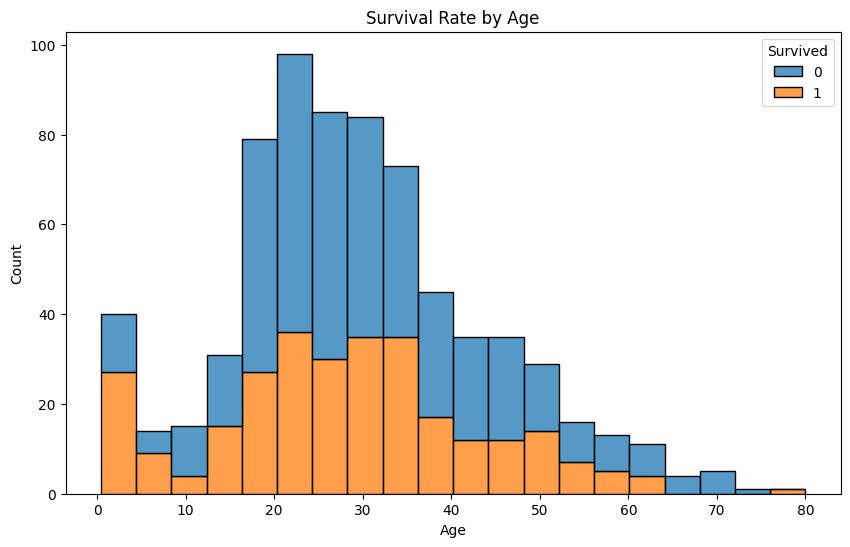

In [15]:
# The survivial rate decrease rapidly when age is higher than 60, while increase a lot when age lower than 10 
# Create a plot to visualize survival rate by age
plt.figure(figsize=(10, 6))

sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20, kde=False)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
# Other data is easily differentiable
# Use Chatgpt to generate part of the following figures codes

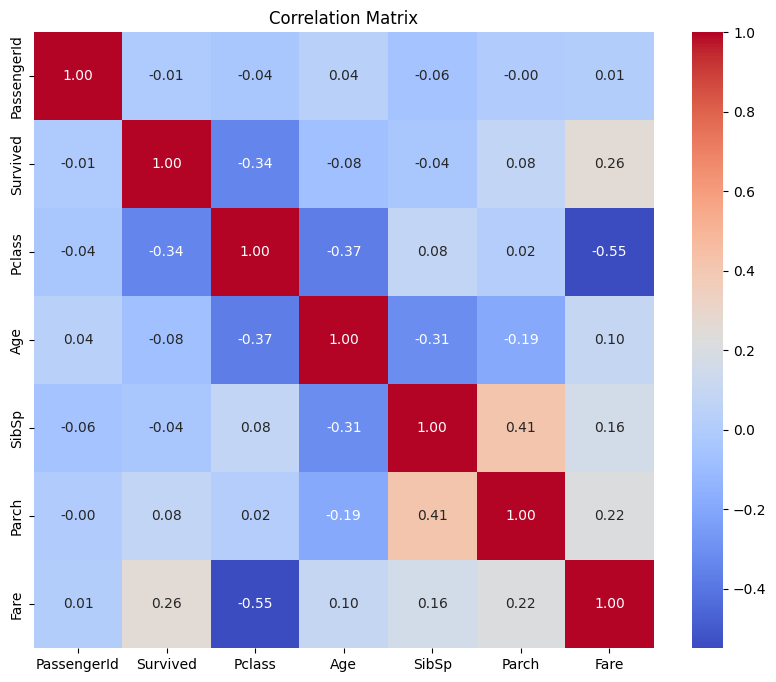

In [17]:
# A heatmap is a good idea, while there are values not numberical
# Select only numeric columns for the correlation matrix
numeric_columns = train.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
# The heatmap reflects the correlation of each feature to survival
# We can futher use this result to predict the missing data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Remaining Features are obvious and easy to konw the correlation to the survival result
# So I use Chatgpt to generate the remaining visulizatoin directly

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

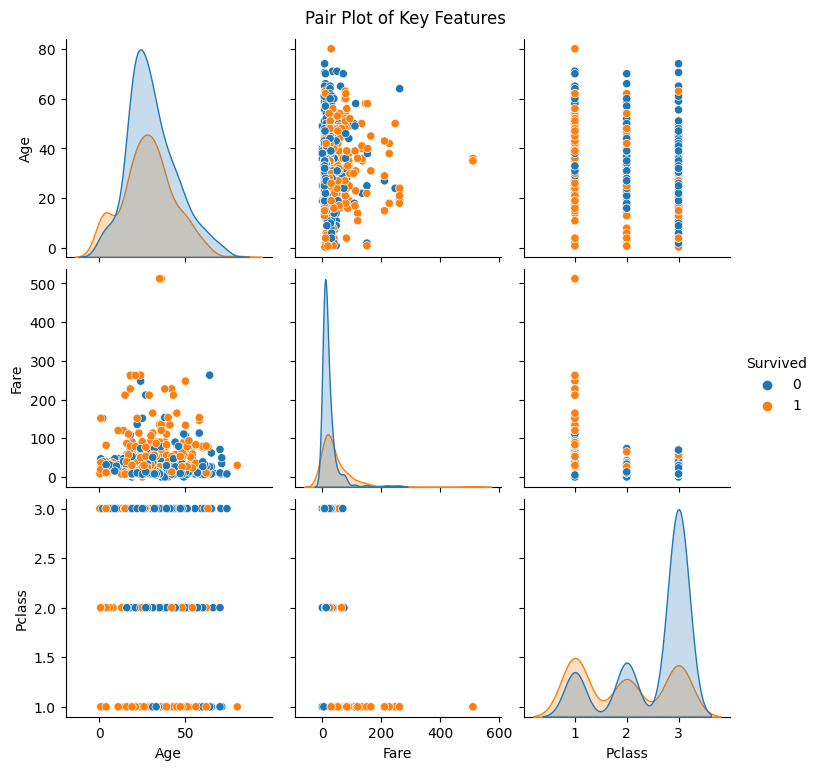

In [19]:
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

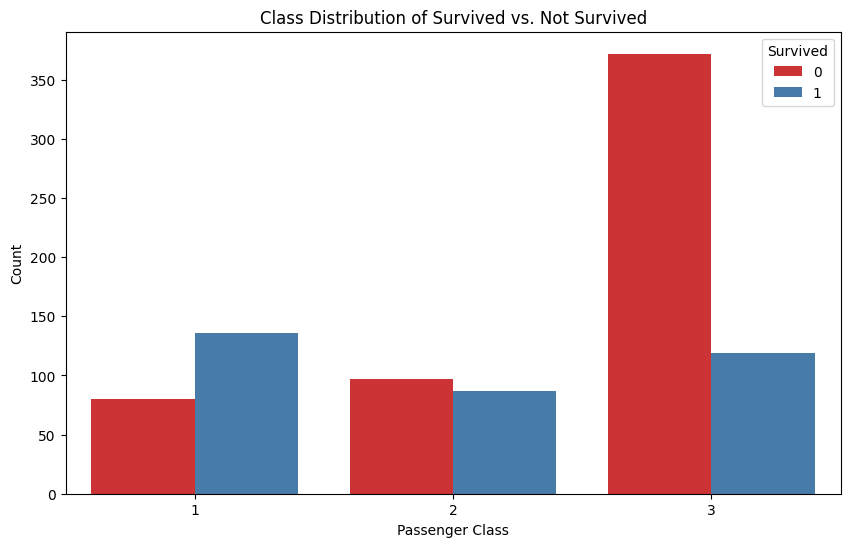

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set1')
plt.title('Class Distribution of Survived vs. Not Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

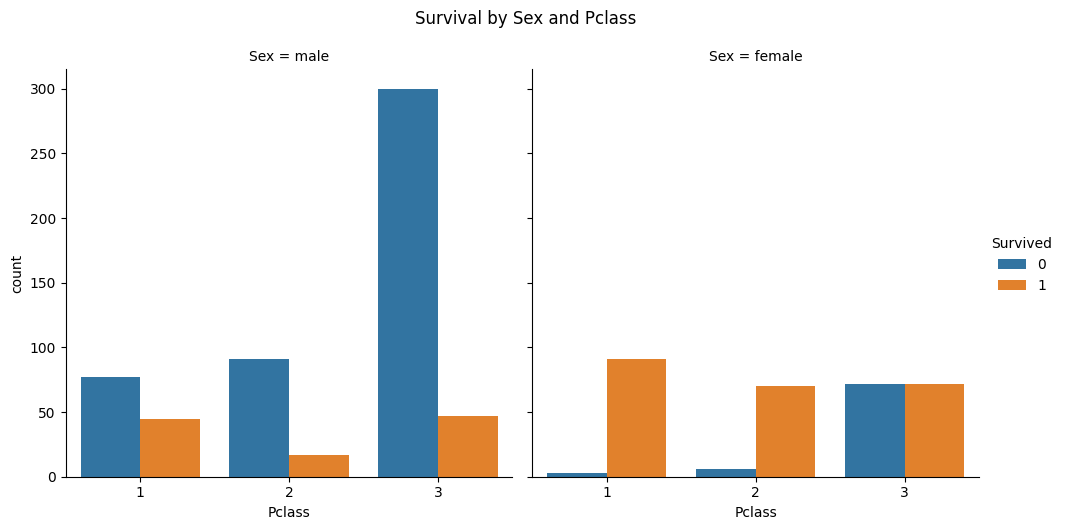

In [21]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=train, height=5, aspect=1)
plt.suptitle('Survival by Sex and Pclass', y=1.05)
plt.show()

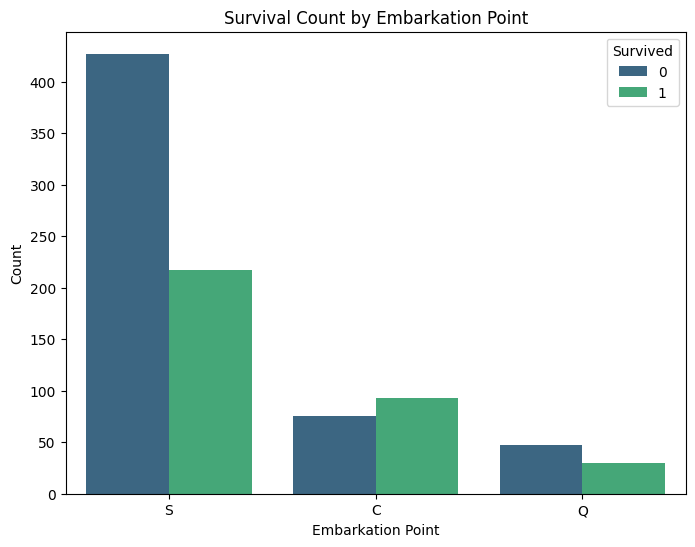

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='viridis')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

## Data Pre-Processing

In [23]:
# In this problem, there are many values missing (NaN)
# Usually the best way is first to predict the missing data according to the known part
# Also, we need to lower the dimension for easier prediction of the final result (The PCA of course)

In [24]:
# Let us fill the unknown data
# Count missing values in each column

# .sum is the function called to count the number of isnull (How many Positive)
missing_values_train = train.isnull().sum()

# Display columns with missing values
print(missing_values_train[missing_values_train > 0])

Age         177
Cabin       687
Embarked      2
AgeGroup    177
dtype: int64


In [25]:
# Also the test data
missing_values_test = train.isnull().sum()

# Display columns with missing values
print(missing_values_test[missing_values_test > 0])

Age         177
Cabin       687
Embarked      2
AgeGroup    177
dtype: int64


### Cabin to Deck

In [26]:
# Remove the cabin data numbers and only keep the first letter
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

# Drop the original Cabin column if it's no longer needed
# train.drop('Cabin', axis=1, inplace=True)
# test.drop('Cabin', axis=1, inplace=True)

In [27]:
# Fill missing Deck information with the most common one Cabin (Mode Imputation)
most_embarked = train.Embarked.dropna().mode()[0]
print('Most frequent port: ',most_embarked)

# Fill missing Embarked values in the train and test datasets without using inplace=True
train['Embarked'] = train['Embarked'].fillna(most_embarked)
test['Embarked'] = test['Embarked'].fillna(most_embarked)

Most frequent port:  S


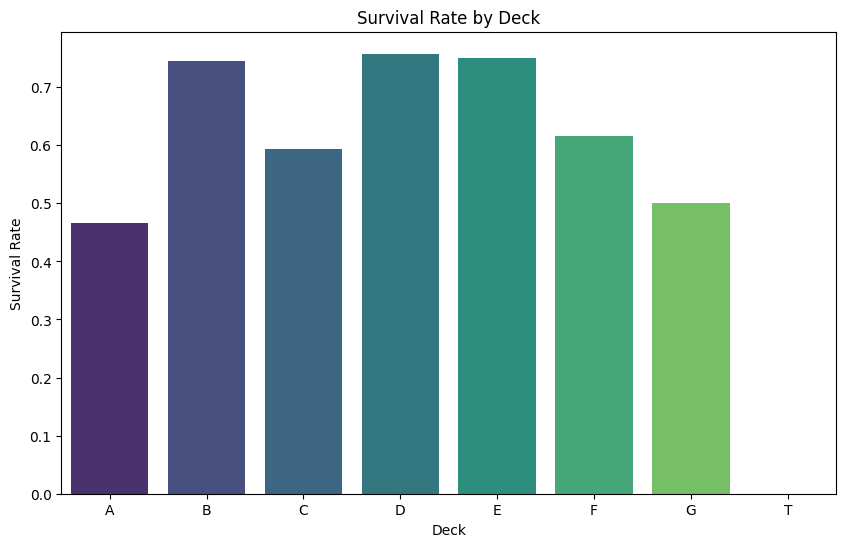

In [28]:
# Calculate survival rates by Deck
deck_survival = train[['Deck', 'Survived']].groupby('Deck').mean()

# Plot the survival rates by Deck
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=deck_survival.index, y=deck_survival['Survived'], palette='viridis')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

In [29]:
# The Deck (Cabin) info including most NaN and correlates less to the Survival, so we just remove it
# Drop the original Deck column if it's no longer needed
train.drop('Deck', axis=1, inplace=True)
test.drop('Deck', axis=1, inplace=True)

### Fare to FareGroup

/tmp/ipykernel_17/2581425968.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


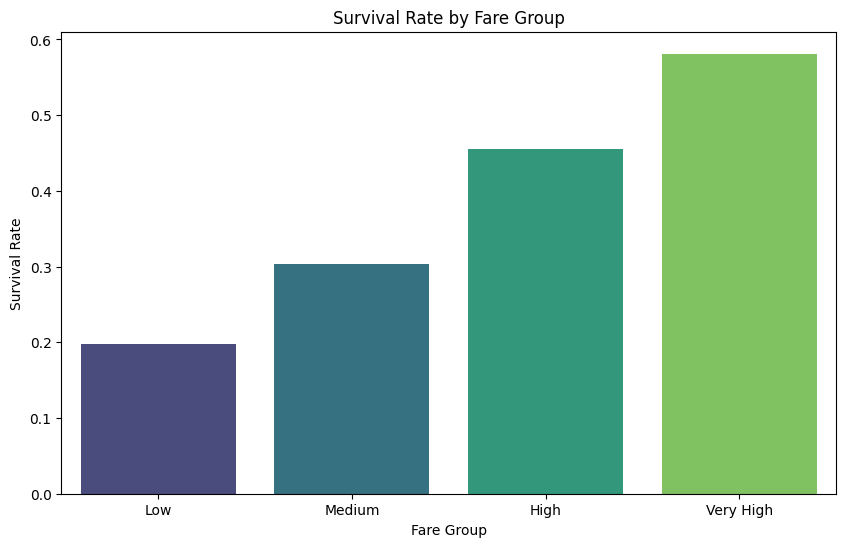

In [30]:
# Step 1: Create FareGroup in the training set
train['FareGroup'] = pd.qcut(train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Step 2: Create FareGroup in the test set (this is essential to avoid the error)
test['FareGroup'] = pd.qcut(test['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Step 3: Group by FareGroup and calculate survival rates in the training data
fare_grouped = train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Step 4: Plot the survival rate by Fare Group
plt.figure(figsize=(10, 6))
sns.barplot(x='FareGroup', y='Survived', data=fare_grouped, palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

## Feature Engineering

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


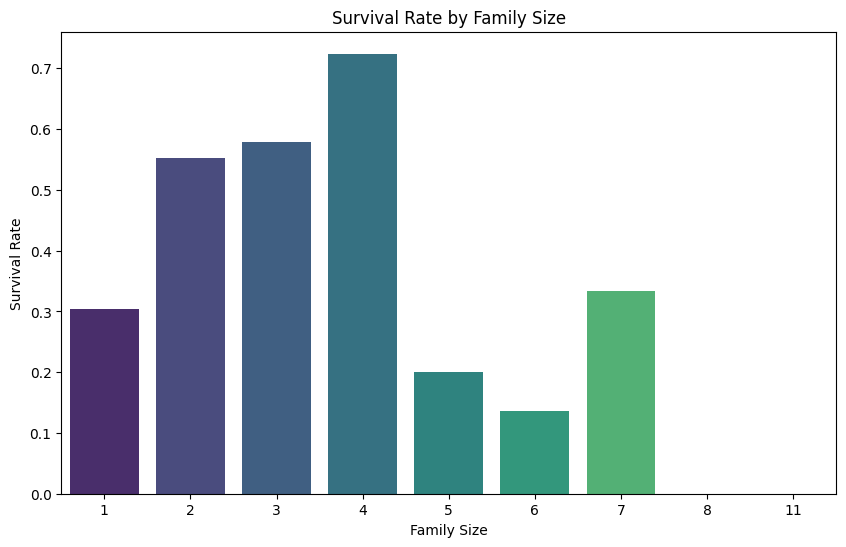

In [31]:
# exploratory data analysis (EDA)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
family_survival = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(family_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [32]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

## Predict the Missing Data

### AgeGroup

In [33]:
# Step 1: Impute missing Age values
# Let us start with an easy one such that we do not need the futher tune of the parameters

from sklearn.ensemble import RandomForestRegressor

# Select the features for imputation
age_features = ['Pclass', 'SibSp', 'Parch', 'Fare']
age_train = train[train['Age'].notnull()][age_features]
age_target = train[train['Age'].notnull()]['Age']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(age_train, age_target)

# Predict missing Age values
age_missing = train[train['Age'].isnull()][age_features]
train.loc[train['Age'].isnull(), 'Age'] = rf.predict(age_missing)

# Use the same features for the test set
age_missing_test = test[test['Age'].isnull()][age_features]

# Predict missing Age values in the test set using the model trained on the training data
test.loc[test['Age'].isnull(), 'Age'] = rf.predict(age_missing_test)

In [34]:
# Step 2: Create AgeGroup feature

# Set the agegroup and remove the age
# Age cannot be sorted directly
# Define age bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a new column with age groups
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Group by the new AgeGroup column

age_grouped = train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False, observed=True).mean().sort_values(by='Survived', ascending=False)

# Apply the same transformation to the test dataset
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

# Drop the Age column
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

##  FareGroup

In [35]:
# Fill missing Deck information with the most common one Cabin (Mode Imputation)
most_fare = train.FareGroup.dropna().mode()[0]
print('Most frequent fare: ',most_fare)

# Fill missing Embarked values in the train and test datasets without using inplace=True
train['FareGroup'] = train['FareGroup'].fillna(most_fare)
test['FareGroup'] = test['FareGroup'].fillna(most_fare)

Most frequent fare:  Medium


# Loading Data

In [36]:
# Checking the data info again

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     891 non-null    object  
 11  AgeGroup     891 non-null    category
 12  FareGroup    891 non-null    category
 13  FamilySize   891 non-null    int64   
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 85.8+ KB


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Young Adult,Low,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Adult,Very High,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,Medium,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Young Adult,Very High,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Young Adult,Medium,1


## Encoding

In [39]:
# Encoding 'Sex'
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}).astype(int)
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [40]:
# Encoding 'AgeGroup'
age_map = {'Child': 0, 'Teen': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4}
train['AgeGroup'] = train['AgeGroup'].map(age_map).astype(int)
test['AgeGroup'] = test['AgeGroup'].map(age_map).astype(int)

In [41]:
# Encoding for 'Embarked'
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [42]:
# Encoding 'FareGroup'
fare_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
train['FareGroup'] = train['FareGroup'].map(fare_map).astype(int)
test['FareGroup'] = test['FareGroup'].map(fare_map).astype(int)

## Features 

In [43]:
# Combining everything above, the needed feathers including:
core_features = ['Sex','AgeGroup','SibSp','Parch','Embarked','FamilySize','FareGroup']

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,1,3,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,0,2,3,2
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,0,2,1,1


In [45]:
# Principle Component Anaylsis is not needed in this problem

# Model

In [46]:
# Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Ensemble Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [48]:
# In this problem we use the XGBoost model
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame and 'Survived' is the target
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop irrelevant features
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize a Logistic Regression classifier
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_logreg = logreg_model.predict(X_val)

# Evaluate the model
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f'Logistic Regression Validation Accuracy: {accuracy_logreg:.4f}')

Logistic Regression Validation Accuracy: 0.8101


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Classifier (SVC)

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize an SVC classifier
svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svc = svc_model.predict(X_val)

# Evaluate the model
accuracy_svc = accuracy_score(y_val, y_pred_svc)
print(f'SVC Validation Accuracy: {accuracy_svc:.4f}')

SVC Validation Accuracy: 0.6648


## Linear Support Vector Classifier (LinearSVC)

In [51]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize a LinearSVC classifier
linear_svc_model = LinearSVC()

# Train the model
linear_svc_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear_svc = linear_svc_model.predict(X_val)

# Evaluate the model
accuracy_linear_svc = accuracy_score(y_val, y_pred_linear_svc)
print(f'LinearSVC Validation Accuracy: {accuracy_linear_svc:.4f}')

LinearSVC Validation Accuracy: 0.7877


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Validation Accuracy: {accuracy_rf:.4f}')

Random Forest Validation Accuracy: 0.8324


## K-Nearest Neighbors (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f'KNN Validation Accuracy: {accuracy_knn:.4f}')

KNN Validation Accuracy: 0.7654


## Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gnb = gnb_model.predict(X_val)

# Evaluate the model
accuracy_gnb = accuracy_score(y_val, y_pred_gnb)
print(f'Gaussian Naive Bayes Validation Accuracy: {accuracy_gnb:.4f}')

Gaussian Naive Bayes Validation Accuracy: 0.7709


## Perceptron

In [55]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Initialize a Perceptron classifier
perceptron_model = Perceptron()

# Train the model
perceptron_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_perceptron = perceptron_model.predict(X_val)

# Evaluate the model
accuracy_perceptron = accuracy_score(y_val, y_pred_perceptron)
print(f'Perceptron Validation Accuracy: {accuracy_perceptron:.4f}')

Perceptron Validation Accuracy: 0.5922


## Stochastic Gradient Descent (SGDClassifier)

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initialize an SGDClassifier
sgd_model = SGDClassifier()

# Train the model
sgd_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_sgd = sgd_model.predict(X_val)

# Evaluate the model
accuracy_sgd = accuracy_score(y_val, y_pred_sgd)
print(f'SGDClassifier Validation Accuracy: {accuracy_sgd:.4f}')

SGDClassifier Validation Accuracy: 0.5866


## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_dt = dt_model.predict(X_val)

# Evaluate the model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f'Decision Tree Validation Accuracy: {accuracy_dt:.4f}')

Decision Tree Validation Accuracy: 0.8045


## XGBoost Classifier

In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize an XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8212


In [59]:
# If needed, we can also consider to tune the  paramters
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Retrain with best parameters
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_val)
best_accuracy = accuracy_score(y_val, y_pred_best)
print(f'Best Validation Accuracy: {best_accuracy:.4f}')

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.6}
Best Validation Accuracy: 0.8268


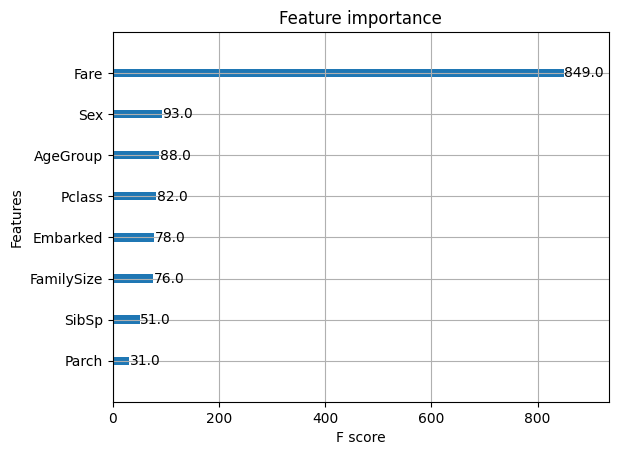

In [60]:
# Feature importance
xgb.plot_importance(best_xgb_model)
plt.show()

In [61]:
# Prepare the test data by ensuring the same order of columns as in the training set
X_test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'FamilySize']]

# Predict using the trained model
test['Survived'] = best_xgb_model.predict(X_test)

# Prepare the submission file
submission = test[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)